# Eye Image Processing

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from eyelib import *

We firstly load the image and crop out eyebrow regions

For referencing:
* `76.png`, `207.png` is a good closing eye image
* `100.png`, `123.png` is a good opening eye image

In [5]:
filename = "eyes/1.png"

In [7]:
eye = cv2.imread(filename)
img_length = eye.shape[0]
eye = eye[round(img_length*0.2):round(img_length*0.8), :]
rgb_eye = cv2.cvtColor(eye, cv2.COLOR_BGR2RGB)

In [8]:
upper_eyelid, lower_eyelid = find_eye_position(eye)
left_lim, right_lim = solve_second_degree(upper_eyelid, lower_eyelid)

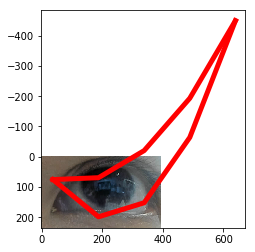

In [9]:
plt.imshow(rgb_eye)
x = np.linspace(left_lim, right_lim, 5)
upper_eyelid_points = np.poly1d(upper_eyelid)(x)
lower_eyelid_points = np.poly1d(lower_eyelid)(x)
plt.plot(x, upper_eyelid_points, linewidth=5, c="red")
plt.plot(x, lower_eyelid_points, linewidth=5, c="red")
plt.show()

In [49]:
def saveeyeimage(filename, output_filename):
    eye = cv2.imread(filename)
    img_length = eye.shape[0]
    eye = eye[round(img_length*0.2):round(img_length*0.8), :]
    rgb_eye = cv2.cvtColor(eye, cv2.COLOR_BGR2RGB)
    upper_eyelid, lower_eyelid = find_eye_position(eye)
    left_lim, right_lim = solve_second_degree(upper_eyelid, lower_eyelid)
    top_lim, buttom_lim = zero_derivative(upper_eyelid), zero_derivative(lower_eyelid)
    x = np.linspace(left_lim, right_lim, 100)
    upper_eyelid_points = np.poly1d(upper_eyelid)(x)
    lower_eyelid_points = np.poly1d(lower_eyelid)(x)
    plt.clf()
    plt.imshow(rgb_eye)
    plt.plot(x, upper_eyelid_points, linewidth=5, c="red")
    plt.plot(x, lower_eyelid_points, linewidth=5, c="red")
    plt.savefig("{}".format(output_filename))

In [28]:
import os

directory = "eyes/brio/"
files = os.listdir(directory)

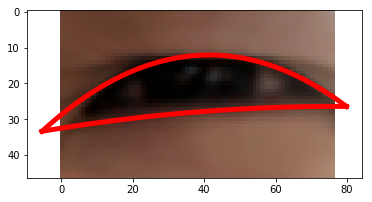

In [35]:
for i in files:
    filename = directory + i
    saveeyeimage(filename, "outputs/"+filename)